# Assignment-1: Data Visualization with Haberman Dataset 


# 1. High level statistics of the dataset:

In [311]:
# importing python libraries for my data analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# import the dataset from my computer folder   ( in csv format)
haberman = pd.read_csv("C:/Users/Harry Singh/Desktop/pml/haberman.csv")


In [312]:
# First 5  values
haberman.head(5)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [313]:
haberman.shape
#  this tells us how many rows nd cols in  the dataset

(306, 4)

In [314]:
haberman.columns
# how many attributes or the features  in the dataset
# status -> is our target or we can say output variable

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [315]:
# Now we have to know  ->  How many data points for each class are present? 
#                      ->  How many patients for each outcome   (1 nd 2) are present

haberman["status"].value_counts()
#----------------------------------------------------------------------------------------------------
# As we see this is not a Balanced dataset  because data points are not equal for both classess
# Haberman is a ImBalanced dataset as number of patient who survived is 225 and the patients who are died are 81.
#----------------------------------------------------------------------------------------------------


# 1. means -> the patient survived 5 years or longer
# 2. means -> the patient died within 5 year
# so their are 225 patients which survived 5 years or later and 
# their are 81 paients which died within 5 years so,  the paitients which are died is less than the patients which survived.
#-----------------------------------------------------------------------------------------------------


#Note:
#Their is a bias in the dataset each (class variable) counts is different so that's why what the conclusions we'll make out of it
# will not be accurate, Because as i know before feed the data  to the ML model we have to balanced the dataset.


1    225
2     81
Name: status, dtype: int64

In [319]:
#  Map the outcome  1 -> Survived  
           #        2 -> Died
# Survived  -> the patient survived 5 years or longer
# Died  -> the patient died within 5 year

# make some data
replace_map = {'status': {1: 'Survived', 2: 'Died'}}
haberman.replace(replace_map, inplace=True)

print(haberman)

     age  year  nodes    status
0     30    64      1  Survived
1     30    62      3  Survived
2     30    65      0  Survived
3     31    59      2  Survived
4     31    65      4  Survived
5     33    58     10  Survived
6     33    60      0  Survived
7     34    59      0      Died
8     34    66      9      Died
9     34    58     30  Survived
10    34    60      1  Survived
11    34    61     10  Survived
12    34    67      7  Survived
13    34    60      0  Survived
14    35    64     13  Survived
15    35    63      0  Survived
16    36    60      1  Survived
17    36    69      0  Survived
18    37    60      0  Survived
19    37    63      0  Survived
20    37    58      0  Survived
21    37    59      6  Survived
22    37    60     15  Survived
23    37    63      0  Survived
24    38    69     21      Died
25    38    59      2  Survived
26    38    60      0  Survived
27    38    60      0  Survived
28    38    62      3  Survived
29    38    64      1  Survived
..   ...

# 2.Our objective

Our objective is, we have to Predict whether patient can survive or not after five years of surgery based on the age,
Patient's year of operation and Number of positive axillary nodes detected.

# 3.Bi-variate analysis 

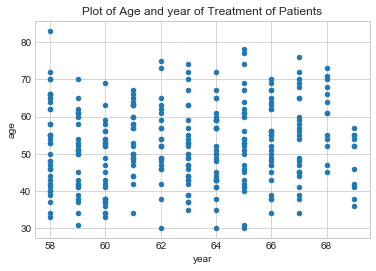

In [317]:
# (scatter plots, pair-plots, counter density plots) to see if combinations of features are useful in classfication.
#------------------------------------------------------------------------------------------------------------------------------

# 2d scatter plot
haberman.plot(kind='scatter', x='year', y='age',title='Plot of Age and year of Treatment of Patients');
plt.show()
# we can't make sence out of it we have to use the seaborn to color  the paients which are died or which are not died. (use the hue)

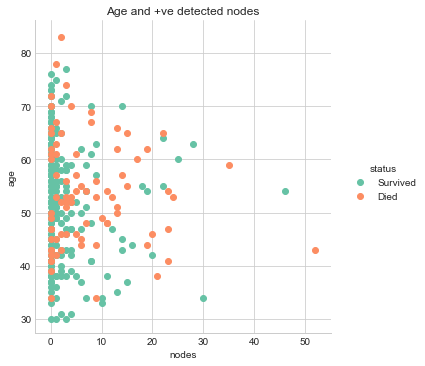

In [318]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status",size=5,margin_titles=True,palette="Set2", ) \
   .map(plt.scatter, "nodes", "age",) \
   .add_legend();
plt.title('Age and +ve detected nodes')
plt.show();


-------------------------------------------------------------------------------------------
Observations: 

1.Data is overlapping to a great extend, so very hard to make some interpretations.

2.As u see from this plot, data is overlapping but most of  the positive nodes detected (In the paitients which survived ) between 0-3.

3.Age is  properly overlapping b/w died nd survived peoples.



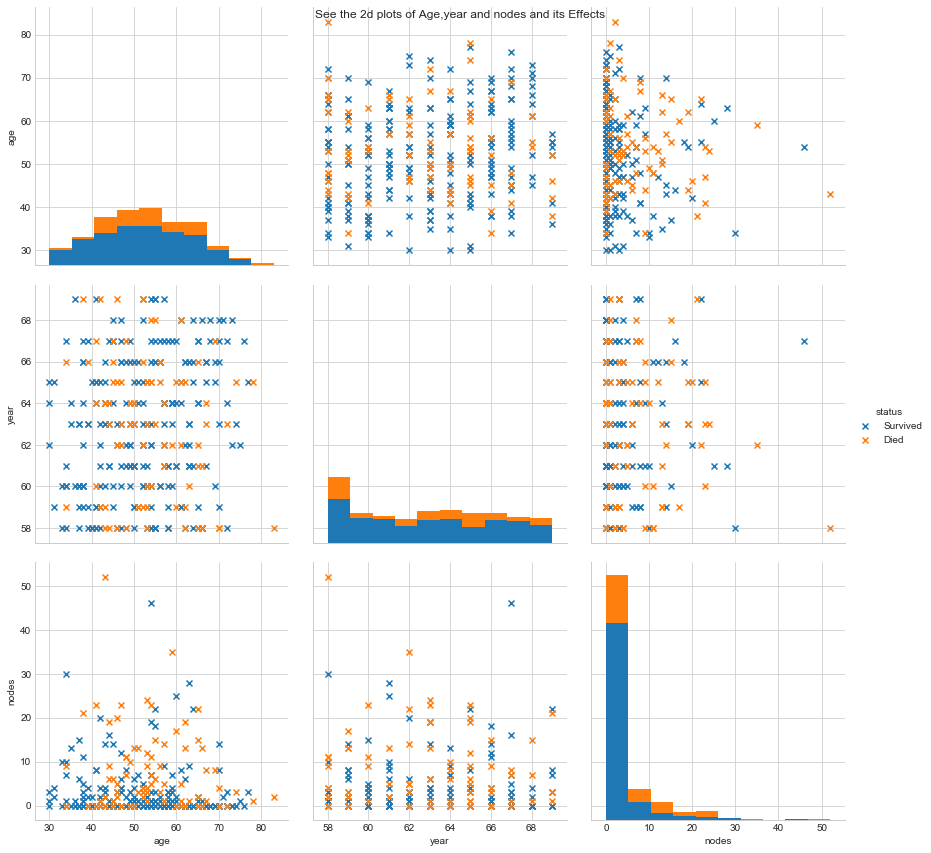

In [330]:
# pairwise scatter plot: Pair-Plot                                  x-y axis   x-y axis   x-y axis
#1. 3 features ->  So,3C2 means 3 plots  which i have to consider (Age-year,  year-nodes, nodes-age)
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status",vars=["age", "year", "nodes"], size=4, markers=["x", "x"]);
plt.suptitle('See the 2d plots of Age,year and nodes and its Effects\n')
plt.show()

Observations:

----------------------------------------------------------------------------------------------------------------------------
1.Age-year plot is properly overlapping so we can't make any sense out of it.

2.Year-Nodes plot is also properly overlappnig so same here, we can't make any sense out of it

3.Nodes-Age plot is  also overlapping but if we deeply see in this plot   mostly (Nodes of the peoples which survived )
between 0-3   and age of the peoples which survived or dead has a great spread. Means Age doesn't matter
in survival or death of the patients in cancer.

4.As mostly nodes between 0-3 but still can't make more sense because still data overlapping to some extend

5.But as do unvariate analysis in( nodes of  the patiets) , I think we can make some conclusions but not accurate.


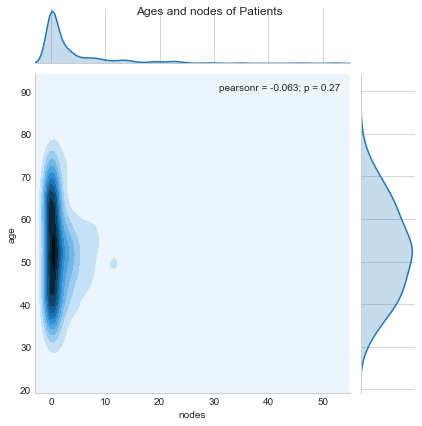

In [334]:
#2D Density plot, contors-plot
sns.jointplot(x="nodes", y="age", data=haberman, kind="kde",);
plt.suptitle('Ages and nodes of Patients')
plt.show();



Observations:
#----------------------------------------------------------------------------------------------------------------------------

1.As i said before mostly people have nodes between 0 - 3  (range 0-3 has a high density), It means mostly paitient (survived or dead)
lies in this range.

2.We have to analyse in deeply (In univariate analysis) so that we can make some relationship of it nd make some sense out of it.Because this (nodes feature) is the only feature which is something differnce means mostly lies accross zero  so we have to preform unvariate analysis in this for making some sense of this data.


#---------------------------------------------------------------------------------------------------------------------------


# 4.Univaraite analysis

In [335]:
#(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
live=haberman[haberman["status"]=='Survived']
died=haberman[haberman["status"]=='Died']
# just take the (survived nd died patients data points) in this live and died variable

D:\miniconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\miniconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of Survived and died patients')

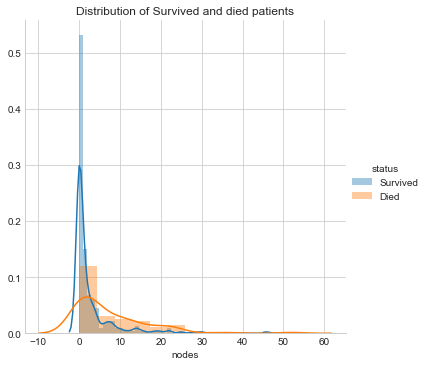

In [337]:
# MAKE A HISTOGRAM nd pdf plot

g = sns.FacetGrid(haberman, hue = 'status',size=5);
g.map(sns.distplot, 'nodes').add_legend()
plt.title('Distribution of Survived and died patients')


Observations:
    
#----------------------------------------------------------------------------------------------------------------------------

1.Mostly peoples  which survived have a  positive axillary nodes lies at zero nd close to zero.

2.Mostly peoples which died lies at  above zero nd close to zero  their is a great spread of the died peoples data as compare to the survival
people data.

3.survived people is more right skewed as compared to the died people's data .Their is a possibility that some outliers.

#---------------------------------------------------------------------------------------------------------------------------


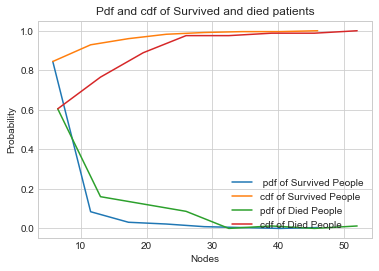

In [375]:
# make a pdf and lets analyse  ---------------------------------


#plot for the live peaple after 5 years of cancer

counts, bin_edges = np.histogram(live['nodes'], bins=8, 
                                 density = True)
pdf = counts/(sum(counts))
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)




# plot for the died peaple with in 5 years of cancer
counts, bin_edges = np.histogram(died['nodes'], bins=8, 
                                 density = True)
pdf = counts/(sum(counts))
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title('Pdf and cdf of Survived and died patients')
#plt.set_xlabel('Smarts')
plt.xlabel('Nodes')
plt.ylabel('Probability')
plt.legend((' pdf of Survived People', 'cdf of Survived People', 'pdf of Died People','cdf of Died People'),
           loc='lower right')
plt.show();

Observations :

1.By seeying this, we can say lots of overlapping in the data.

2.we can't make any accurate decisions,just looking at this.

------------------------------------------------------------------------------------------------------------


Now will we do descriptive statistics on this ex-> we'll understand the data (its percentage,average,spread).

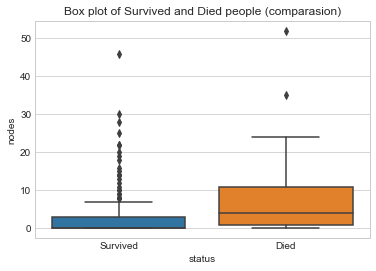

In [371]:
# box plots for the outliers  nd check how many outliers we have in this inbalanced  dataset
# age and the year is strongly overlapping, so no need to do the analysis on that and  just see the pattern in the nodes
sns.boxplot(x='status',y='nodes', data=haberman)
#sns.swarmplot(x="status", y="nodes", data=haberman, color=".25")
plt.title('Box plot of Survived and Died people (comparasion)')

plt.show()


#------------------------------------------------------------------------------------------------------------------------------

Observations:

1.From this Box plot, we can analyse the people who survived nd  had a lots of outliers in the nodes, It means very far away from the average nodes detected of the peoples.

2.And also very big difference between the means and the spread of the data (in terms of nodes)  in died nd survive peoples.

3.In this case, I think we have to use the medians because with so many outliers in the survived peoples data points,mean will 
drastically increase.
#-------------------------------------------------------------------------------------------------------------------------------


In [100]:
#--------------------------------------------Apply statistics------------------------------------------------------------
live['nodes'].describe()
# this is the live peoples data

count    225.000000
mean       2.791111
std        5.870318
min        0.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       46.000000
Name: nodes, dtype: float64

In [88]:
died['nodes'].describe()
# we can't use the age and the year featre in the dataset for analysize the data because it is strong overlaping

count    81.000000
mean      7.456790
std       9.185654
min       0.000000
25%       1.000000
50%       4.000000
75%      11.000000
max      52.000000
Name: nodes, dtype: float64

In [181]:

print("Ouartiles of the dead nd survived patients:")
print(np.percentile(live["nodes"],np.arange(0, 100, 25))) # extreme are the outliers 
print(np.percentile(died["nodes"],np.arange(0, 100, 25)))# very extreme bro

Ouartiles of the dead nd survived patients:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]




Observations:

1.As you can see, In the survived peoples data points  75% of peoples have nodes = zero.


2.As you can see, In the Died peoples data points less than 25% of peoples have nodes = zero.


3.In the survived peoples data points ,75 % of peoples have the zero nodes,nd in the died peoples data points only 
less than 25% of peoples have a nodes =  zero,

So we can conclude from this ,is if  our new paitient have Number of positive axillary nodes detected close to zero or zero
then their is a high probability, that  paitient will survive nd low probability that patient will died but we have low probability

because less than 25 % peoples have a  nodes close to zero or zero.

4.Also their is a big difference between the average number of nodes detected in  peoples which survived nd the peoples which died.

5.ALso IQ range in the survived people is , mostly survived peoles have a  +ve node detected = zero.


In [101]:
from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(died["nodes"]))
print(robust.mad(live["nodes"]))
# that is the big challenge beacuse of ourliers in the data of the live peoples mean nd s.dev drastically  increase


Median Absolute Deviation
5.930408874022408
0.0


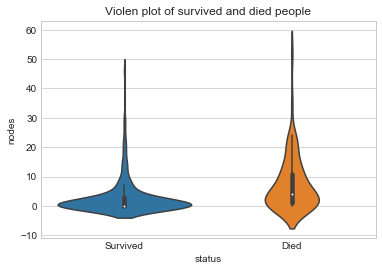

In [373]:
# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.title('Violen plot of survived and died people')
plt.show()

Observations:

#-------------------------------------------------------------------------------

1.Spread is high in the died peoples (in terms of nodes )as compared to survived peoples, by analysing or seeying the 
mad and the violen plots.


2.As i said before,Roughly we can say->

     -> If new patient have a +ve nodes detected close to zero nd zero then probality
        of his survival is 75% nd 
        probability of  his die is 25 %. In simple words high probablility of survive of patient.
        
     -> If new patient have a +ve nodes detected greater than 7 then probality
        of his survival is less than the probability of  his death.
        In simple words probablility of (die of paitient) is high.
         




In [188]:

print("\n90th Percentiles:")
print(np.percentile(live["nodes"],90))
print(np.percentile(died["nodes"],90))


90th Percentiles:
8.0
20.0


In [ ]:
# --------------------------------------------------------------------------
#It means that 90% of peoples which survived has  a nodes less than 8.0
#It means that 90% of peoples which die      has  a nodes less than 20.0
#--------------------------------------------------------------------------

In [214]:

print('****************************************************************')
print('\nthe Outlier  detection  for the survived peoples\n')
#  the Outliers for the live peoples
#  Q3+(1.5*IQ)
print(0+(1.5*0))
print('\nthe Outlier  detection for the died peoples\n')
# the Outliers for the died peoples
print(4+(1.5*4))






****************************************************************

the Outlier  detection  for the survived peoples

0.0

the Outlier  detection for the died peoples

10.0


In [215]:


#---------------------------------------------------------------------------------------------------------------------------


print('****************************************************************')


print('****************************************************************')
# if we take zero as a threshold then
print('What percentage of live peoples have a nodes detected > 0')


print(live.loc[live['nodes']>0].count())
print((108/225)*100 ,'%')
print('\n')


print('What percentage of live peoples have a nodes detected = 0')

print(live.loc[live['nodes']==0].count())
print((117/225)*100 ,'%')


print('-----------------------------------------------------------------------------------------------------')
print('  48% outliear in the survived peoples data means 48% of survived  patints have a  +ve nodes detected > 0\n')
print('-----------------------------------------------------------------------------------------------------')



print('\n')
print('What percentage of died peoples have a nodes detected  >0')

print(died.loc[died['nodes']>0].count())
print((62/81)*100 ,'%')
print('\n')

print('What percentage of died peoples have a nodes detected  =0')

print(died.loc[died['nodes']==0].count())
print((19/81)*100 ,'%')
print('\n')



print('-----------------------------------------------------------------------------------------------------')
print(' 76.5% of the died  patints have a  +ve nodes detected > 0\n')
print('-----------------------------------------------------------------------------------------------------')



****************************************************************
****************************************************************
What percentage of live peoples have a nodes detected > 0
age       108
year      108
nodes     108
status    108
dtype: int64
48.0 %


What percentage of live peoples have a nodes detected = 0
age       117
year      117
nodes     117
status    117
dtype: int64
52.0 %
-----------------------------------------------------------------------------------------------------
  48% outliear in the survived peoples data means 48% of survived  patints have a  +ve nodes detected > 0

-----------------------------------------------------------------------------------------------------


What percentage of died peoples have a nodes detected  >0
age       62
year      62
nodes     62
status    62
dtype: int64
76.5432098765432 %


What percentage of died peoples have a nodes detected  =0
age       19
year      19
nodes     19
status    19
dtype: int64
23.456790123456788 %

# Final Observation

------------------------------------------------------------------------------------------------------


1.Number of positive axillary nodes detected  in the patients is the most important feature because all the other features are 
overlapping to a great extend.Also nodes is overlapping but when we see this feature in deeply than we can conclude something
(not accuratly) because this is inbalanced dataset.

2.Mostly Patients have +ve nodes detected is lies at zero or close to zero So we conclude:
-> If New patient comes in Hospital then if by testing its +ve nodes detected is close to zero or ==zero then
high probability that patient will survive as compared to patient'll die.

3.If nodes detected in a pateint is > 7 high probability that patient will die (conclusion using voilen plot)

4.Before feed into model we have to balanced the dataset so that we can make the accurate decisions.


Thanks,


----------------------------------------------------------------------------------------------------